In [2]:
# Import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


In [51]:
# Load data
df = pd.read_csv("../data/gameandgrade new.csv")
df.head()

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade,percentage
0,0,1,1,2,1,1,4,4,5,77.50,"7750,00%"
1,1,1,1,3,1,1,1,3,3,83.00,"8300,00%"
2,0,1,0,0,0,0,1,3,3,80.00,"8000,00%"
3,0,1,3,5,1,1,2,2,3,45.00,"4500,00%"
4,1,1,1,1,2,1,1,3,4,85.00,"8500,00%"


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sex               770 non-null    int64 
 1   School Code       770 non-null    int64 
 2   Playing Years     770 non-null    int64 
 3   Playing Often     770 non-null    int64 
 4   Playing Hours     770 non-null    int64 
 5   Playing Games     770 non-null    int64 
 6   Parent Revenue    770 non-null    int64 
 7   Father Education  770 non-null    int64 
 8   Mother Education  770 non-null    int64 
 9   Grade             770 non-null    object
 10  percentage        770 non-null    object
dtypes: int64(9), object(2)
memory usage: 66.3+ KB


In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,770.0,0.498701,0.500323,0.0,0.00,0.0,1.0,1.0
School Code,770.0,4.944156,2.999913,1.0,2.00,4.0,8.0,11.0
Playing Years,770.0,1.584416,1.407306,0.0,0.00,1.0,3.0,4.0
Playing Often,770.0,2.242857,1.923635,0.0,0.00,2.0,4.0,5.0
Playing Hours,770.0,1.488312,1.337853,0.0,0.00,1.0,2.0,5.0
Playing Games,770.0,0.706494,0.458509,0.0,0.00,1.0,1.0,2.0
Parent Revenue,770.0,1.837662,1.064077,0.0,1.00,2.0,2.0,4.0
Father Education,770.0,3.718182,1.171756,0.0,3.00,4.0,5.0,6.0
Mother Education,770.0,3.410390,1.176447,0.0,2.25,3.0,4.0,6.0


In [54]:
df.describe(include="object").T

,count,unique,top,freq
Grade,770,105,100,104
percentage,770,104,"10000,00%",104


In [55]:
df.isna().sum()

Sex                 0
School Code         0
Playing Years       0
Playing Often       0
Playing Hours       0
Playing Games       0
Parent Revenue      0
Father Education    0
Mother Education    0
Grade               0
percentage          0
dtype: int64

In [56]:
df.duplicated().sum()

np.int64(16)

In [57]:
df.columns

Index(['Sex', 'School Code', 'Playing Years', 'Playing Often', 'Playing Hours',
       'Playing Games', 'Parent Revenue', 'Father Education',
       'Mother Education', 'Grade', 'percentage'],
      dtype='object')

In [58]:
# Split cols

cat_col = ['Sex', 'School Code', 'Playing Years', 'Playing Often', 'Playing Hours',
       'Playing Games', 'Parent Revenue', 'Father Education',
       'Mother Education']
target = "Grade"
to_drop = ["percentage"]

df[target] = pd.to_numeric(df[target].str.split(".",expand = True)[0])
X = df.drop([target] + to_drop, axis = 1)
y = df[target]

<Axes: xlabel='Grade', ylabel='Count'>

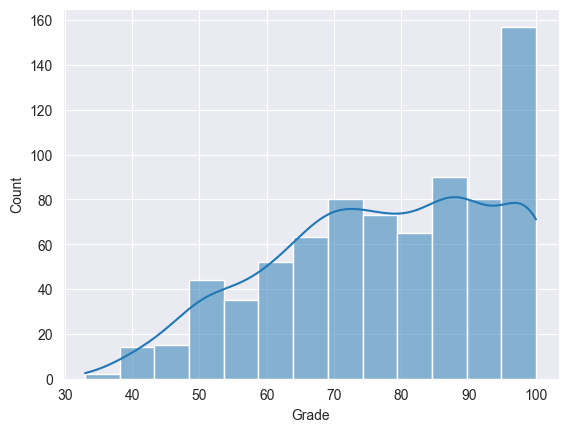

In [59]:
sns.histplot(df[target], kde = True)

Sex
0    386
1    384
Name: count, dtype: int64


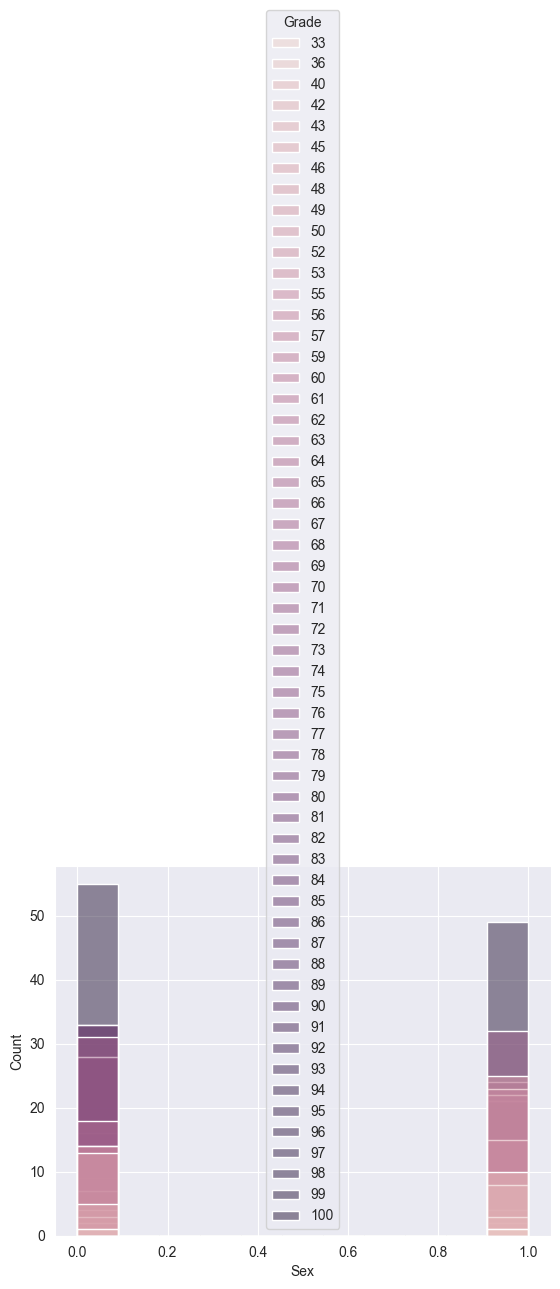

School Code
4     148
8     140
1     112
2     106
3      66
9      50
7      41
5      34
10     32
6      21
11     20
Name: count, dtype: int64


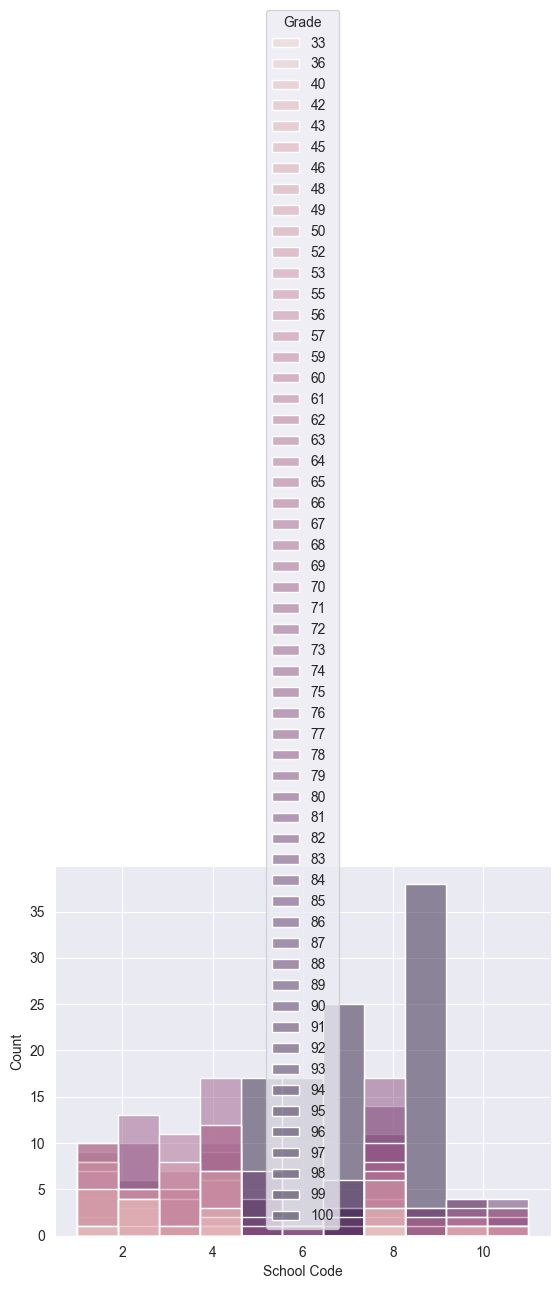

Playing Years
0    227
1    193
2    137
4    114
3     99
Name: count, dtype: int64


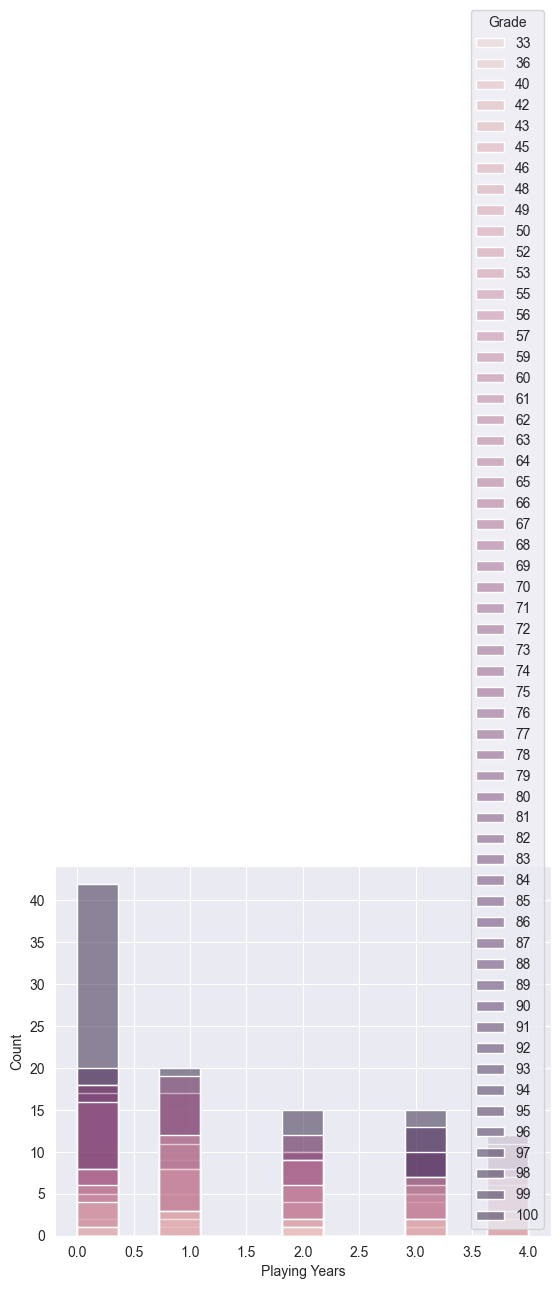

Playing Often
0    227
5    156
1    115
3    112
4     88
2     72
Name: count, dtype: int64


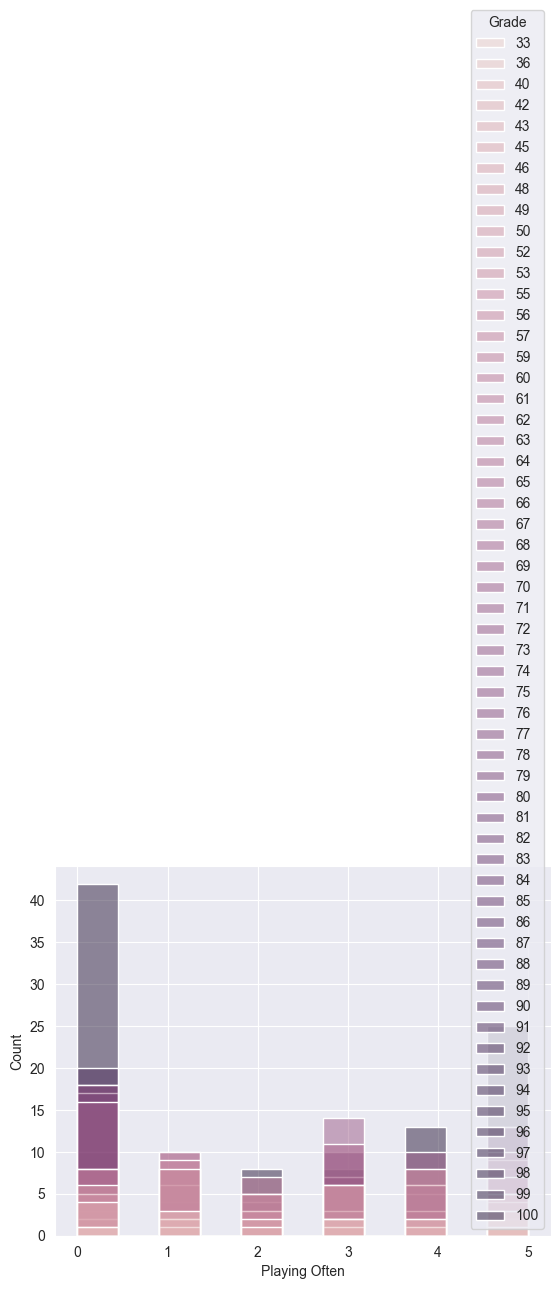

Playing Hours
0    227
1    193
2    181
3    113
5     28
4     28
Name: count, dtype: int64


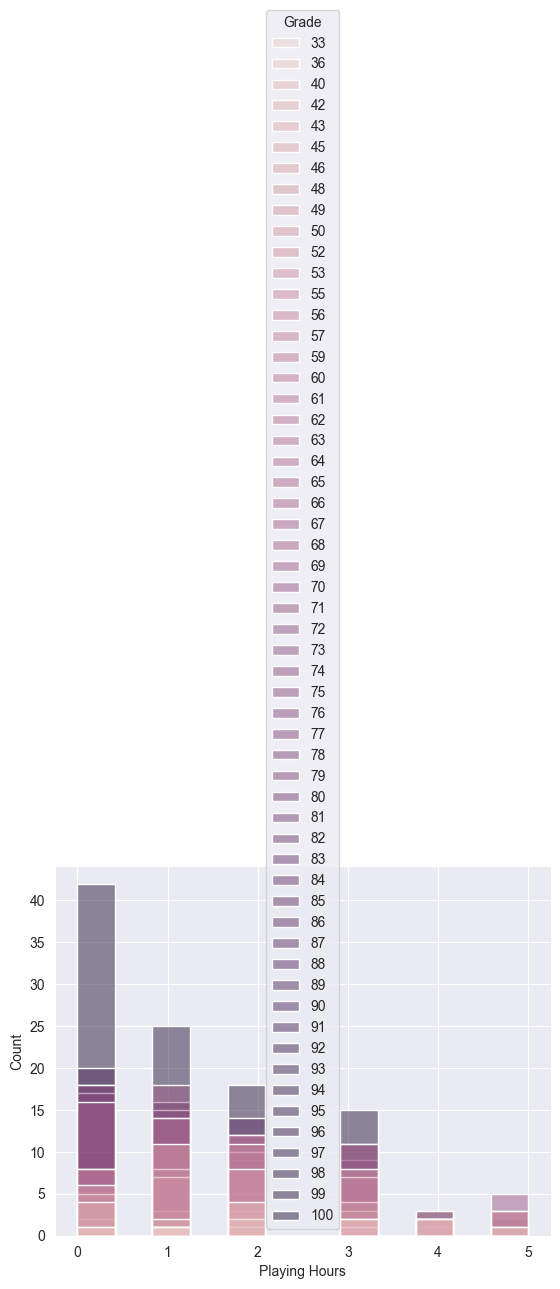

Playing Games
1    542
0    227
2      1
Name: count, dtype: int64


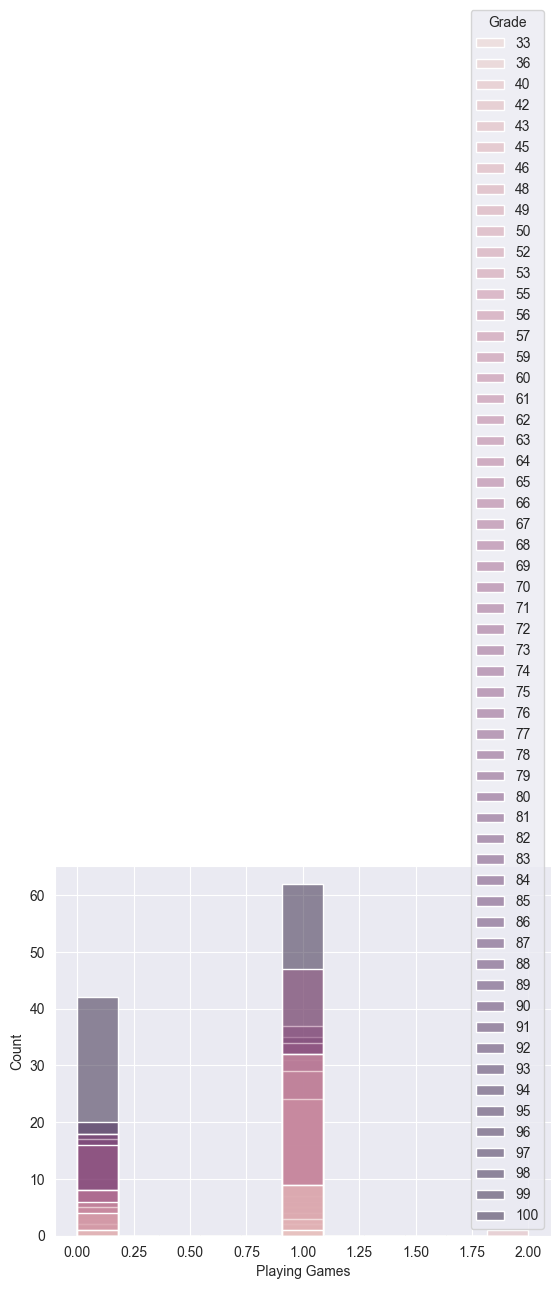

Parent Revenue
2    302
1    185
3    142
0     91
4     50
Name: count, dtype: int64


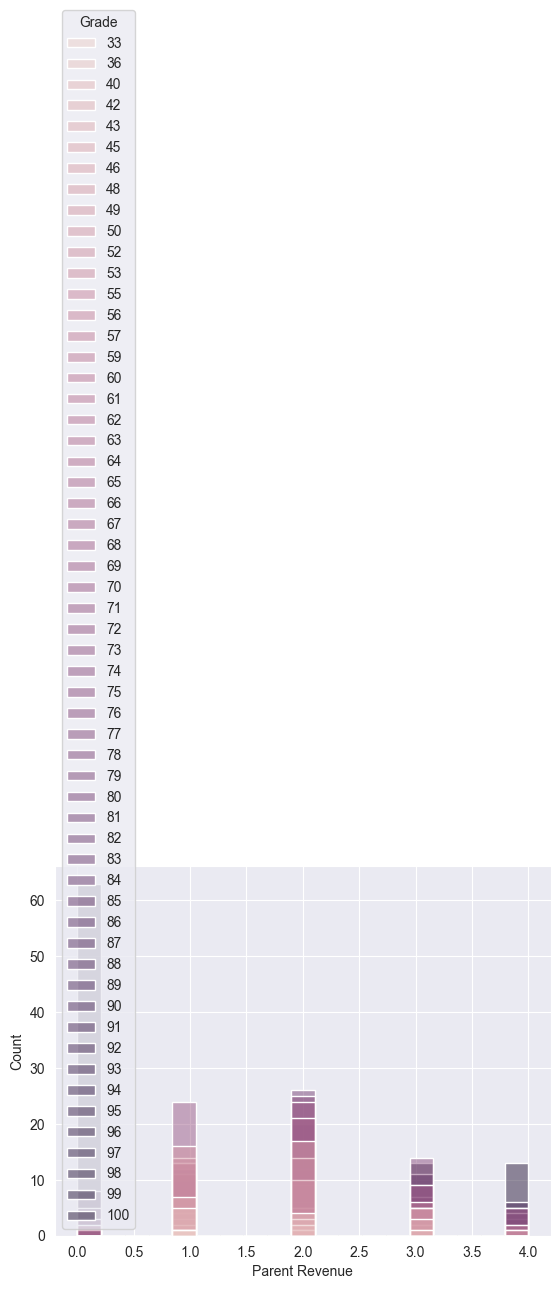

Father Education
4    262
3    178
5    153
2    123
6     44
1      6
0      4
Name: count, dtype: int64


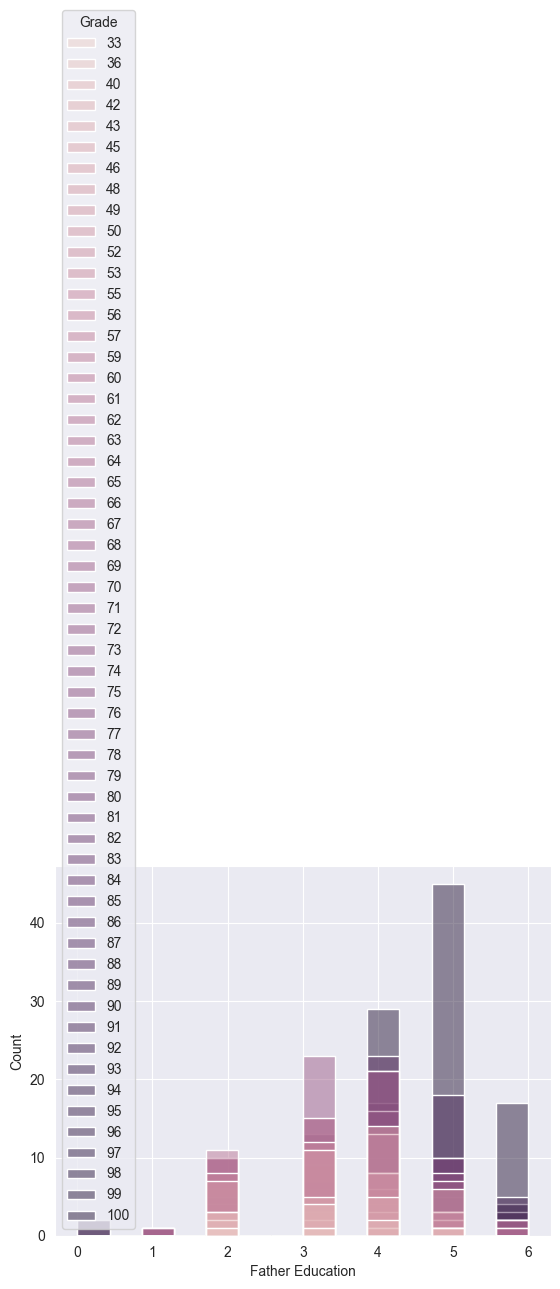

Mother Education
4    245
3    199
2    165
5    106
1     27
6     27
0      1
Name: count, dtype: int64


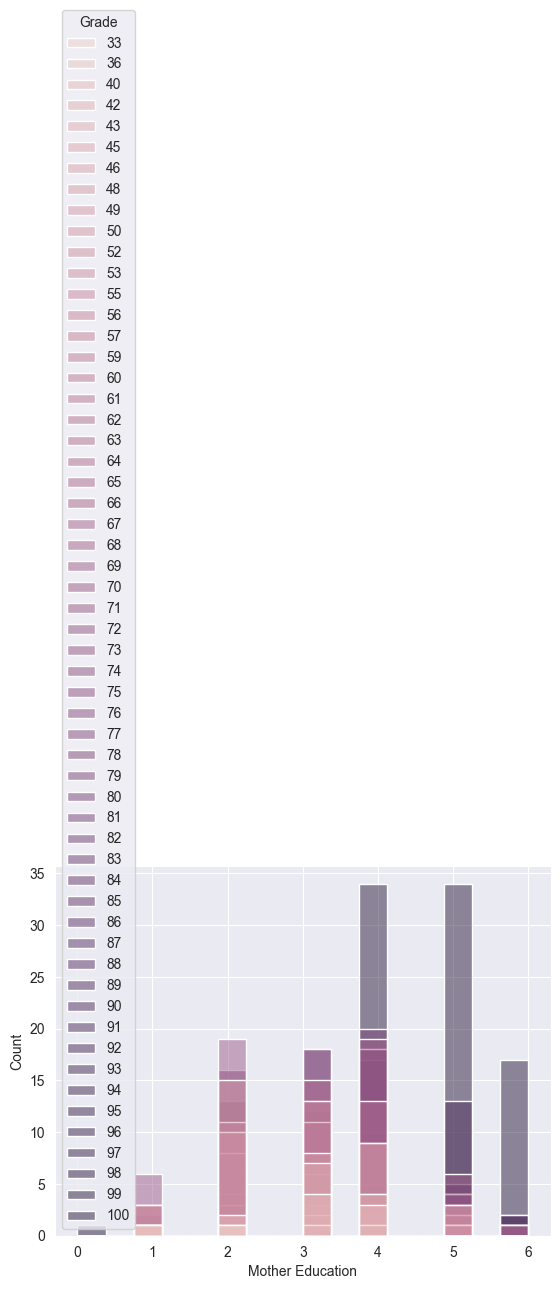

In [60]:
# Visualizing X

for col in cat_col:
    print(X[col].value_counts())
    sns.histplot(x = X[col], hue = y)
    plt.show();

<Axes: >

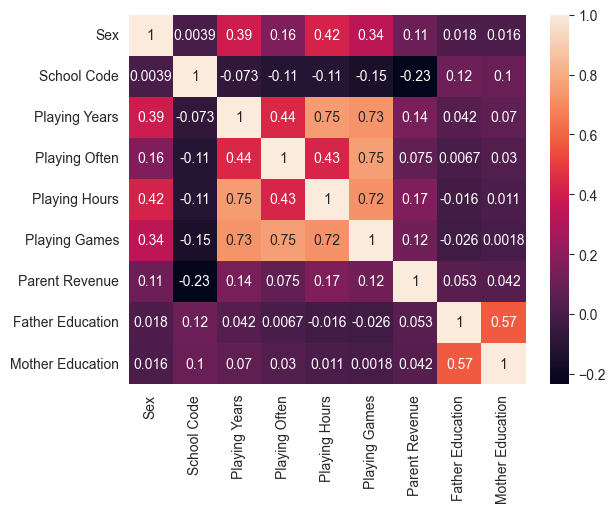

In [65]:
corr = X.corr()
corr

sns.heatmap(corr, annot=True)

In [66]:
# Playing variables are very well correlated

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape)

(577, 9) (193, 9)


In [69]:
# Transformations and feat Engg



from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures, PowerTransformer
from sklearn.decomposition import PCA



num_transf = ColumnTransformer([
    ("poly", PolynomialFeatures(interaction_only=True), cat_col),
    ("log_trans", FunctionTransformer(func = np.log1p), cat_col),
    ("pca", PCA(n_components=2), cat_col)
], remainder="passthrough")


In [92]:
# Modeling pipeline

from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

models = {
    "dummy" : DummyRegressor(),
    "lr" : LinearRegression(),
    "hub" : HuberRegressor(max_iter=3000),
    "rf" : RandomForestRegressor(max_depth=5)
}

estimator = DecisionTreeRegressor(random_state=42, max_depth=4)

for name, model in models.items():
    print("="*20, name, "="*20)

    full_pipeline = Pipeline([
        ("trans", num_transf), 
        ("selection", SelectFromModel(estimator, max_features=int(np.sqrt(X_train.shape[0])))),
        ("model", model)
    ]).set_output(transform="pandas")

    cv_scores = cross_val_score(full_pipeline, X_train, y_train, cv = 3, scoring="neg_mean_squared_error")
    print(cv_scores, np.mean(cv_scores), np.std(cv_scores))

    # Fully train the pipeline

    full_pipeline.fit(X_train,y_train)
    y_pred = full_pipeline.predict(X_test)

    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test, y_pred)

    print("MSE: ", mse)
    print("R2:", r2)


==================== dummy ====================
[-288.06918333 -265.61512052 -235.33048564] -263.00492983268674 21.60944824339439
MSE:  303.234253045317
R2: -0.0008813905618738627
==================== lr ====================
[-238.76584897 -221.63148421 -198.03390352] -219.47707889700314 16.69838199032752
MSE:  229.5042484681429
R2: 0.24247828522088477
==================== hub ====================
[-247.66595574 -222.24808462 -199.37733259] -223.09712431791854 19.722887427601936
MSE:  227.8192214095948
R2: 0.2480400323142845
==================== rf ====================
[-220.23084935 -206.53758107 -184.88920657] -203.88587899550626 14.549491889920818
MSE:  187.2660618536133
R2: 0.3818933233605386


In [97]:
models["rf"].feature_importances_

array([0.07057173, 0.05309207, 0.06275639, 0.16361244, 0.05722381,
       0.09684097, 0.43531848, 0.06058412])

<Axes: xlabel='importance', ylabel='features'>

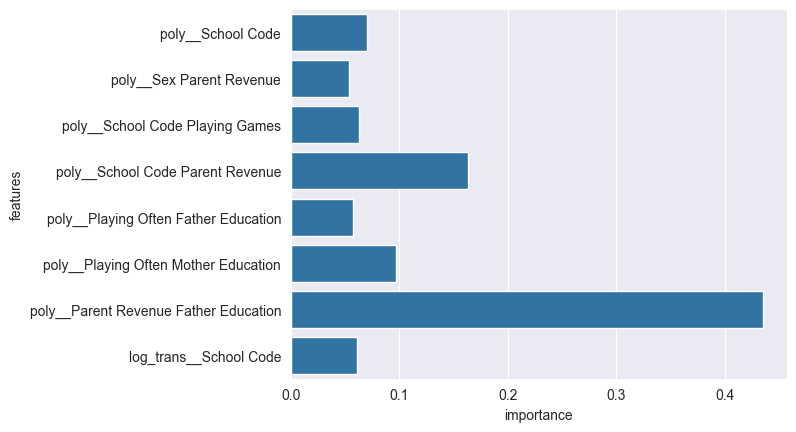

In [105]:
# Feature importance explaination

X_train_transformed = full_pipeline[:-1].transform(X_train)
feat_importance = pd.DataFrame(data={
    "features" : X_train_transformed.columns,
    "importance" : models["rf"].feature_importances_
})

sns.barplot(data = feat_importance, y = "features", x = "importance", orient="h")

# Conclusion:

1. Best model: RF -> poly features